In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

# import and display summary data
model = pd.read_excel(r'C:\Users\Jacob\Downloads\Moscow House Prices.xlsx')
model.head()
model.describe()

# Price in 1000s, Sq Ft in 100s, Lot Size in 1000s SqFt

,Home ID,Price,Bed,Bath,SqFt,LotSize,Age,Garage,Detached,ACnum
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,56.000000,330.442793,3.441441,2.292793,20.843063,11.600955,48.945946,1.450450,0.153153,0.504505
std,32.186954,99.237557,0.997129,0.793349,9.479571,16.854827,36.037566,0.860642,0.361768,0.502247
min,1.000000,165.000000,2.000000,1.000000,6.980000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,28.500000,259.500000,3.000000,2.000000,13.530000,6.337500,17.500000,1.000000,0.000000,0.000000
50%,56.000000,304.500000,3.000000,2.000000,18.640000,8.886000,42.000000,2.000000,0.000000,1.000000
75%,83.500000,389.500000,4.000000,3.000000,25.970000,10.889500,72.500000,2.000000,0.000000,1.000000
max,111.000000,745.000000,7.000000,4.000000,54.080000,148.975000,131.000000,3.000000,1.000000,1.000000


In [2]:
num1 = model[['Price', 'LotSize']].dropna() #creates new variable w/ Price and SqFt as only columns
mod1 = smf.ols(formula='Price ~ LotSize', data=num1) #using var above, create regression model using statsmodels

In [3]:
mod1fit = mod1.fit() #fit data to model

In [4]:
print(mod1fit.summary()) #display regression summary

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     16.82
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           7.95e-05
Time:                        00:56:53   Log-Likelihood:                -659.36
No. Observations:                 111   AIC:                             1323.
Df Residuals:                     109   BIC:                             1328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    305.4691     10.707     28.529      0.0

In [5]:
# Price = 153 + 8.5(SqFt)
from matplotlib import pyplot as plt 

In [6]:
# Plot code
pricepred = mod1fit.predict() #best fit line

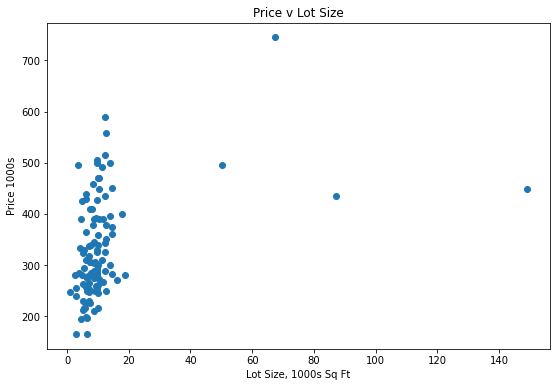

In [7]:
plt.figure(figsize=(9, 6))
plt.plot(num1['LotSize'], num1['Price'], 'o') #Scatter
plt.xlabel('Lot Size, 1000s Sq Ft')
plt.ylabel('Price 1000s')
plt.title('Price v Lot Size')

plt.show()

In [8]:
model = model[model.LotSize < 43.5] #Drop all results with lot size less than 43.5k

In [9]:
model.describe() #Double check it worked

,Home ID,Price,Bed,Bath,SqFt,LotSize,Age,Garage,Detached,ACnum
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,56.906542,322.935981,3.411215,2.247664,20.303364,8.728963,49.803738,1.420561,0.149533,0.504673
std,32.153386,89.706315,0.951199,0.769016,9.179535,3.341580,36.384073,0.858227,0.358291,0.502331
min,2.000000,165.000000,2.000000,1.000000,6.980000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,29.500000,258.500000,3.000000,2.000000,13.100000,6.229000,17.500000,1.000000,0.000000,0.000000
50%,57.000000,299.000000,3.000000,2.000000,18.400000,8.712000,42.000000,2.000000,0.000000,1.000000
75%,84.500000,384.000000,4.000000,3.000000,25.030000,10.345000,73.500000,2.000000,0.000000,1.000000
max,111.000000,589.000000,6.000000,4.000000,54.080000,18.730000,131.000000,3.000000,1.000000,1.000000


In [10]:
#rerunning regression
Num1 = model[['Price', 'LotSize']].dropna() #now have num1 (orig) and Num1 (<43.5)
Mod1 = smf.ols(formula='Price ~ LotSize', data=Num1) #looks same, but updated data
Mod1fit = Mod1.fit() #fit to model
print(Mod1fit.summary()) #print regression summary

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     14.98
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           0.000189
Time:                        00:56:54   Log-Likelihood:                -625.32
No. Observations:                 107   AIC:                             1255.
Df Residuals:                     105   BIC:                             1260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    240.1305     22.894     10.489      0.0

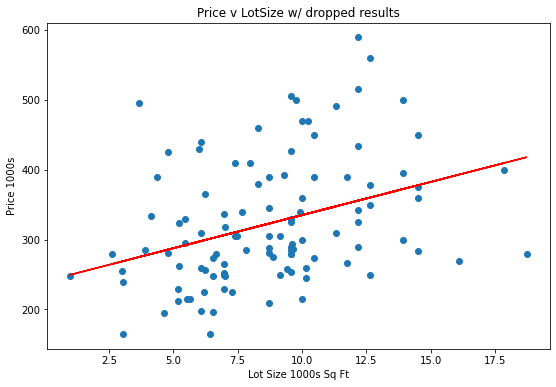

In [11]:
# Price = 7.86(SqFt) + 163.3
Pricepred = Mod1fit.predict()
plt.figure(figsize=(9, 6))
plt.plot(Num1['LotSize'], Num1['Price'], 'o') #Scatter
plt.plot(Num1['LotSize'], Pricepred, 'r') #Prediction Line graph, layered over first
plt.xlabel('Lot Size 1000s Sq Ft')
plt.ylabel('Price 1000s')
plt.title('Price v LotSize w/ dropped results')

plt.show()

In [12]:
num2 = model[['Price', 'Bed', 'Bath', 'SqFt']] #select data for number 2

In [13]:
mod2 = smf.ols(formula='Price ~ Bed + Bath + SqFt', data=num2)

In [14]:
mod2 = mod2.fit() #fit to model

In [15]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     87.53
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           3.23e-28
Time:                        00:56:54   Log-Likelihood:                -564.68
No. Observations:                 107   AIC:                             1137.
Df Residuals:                     103   BIC:                             1148.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    122.7708     19.110      6.424      0.0

In [16]:
# Price = 122.77 + -2(Bed) + 43(Bath) + 5.5(SqFt)
num3 = model[['Price', 'Bath', 'SqFt', 'Age']]

In [17]:
mod3 = smf.ols(formula='Price ~ Bath + SqFt + Age', data=num3)

In [18]:
mod3 = mod3.fit()

In [19]:
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     101.5
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           1.23e-30
Time:                        00:56:54   Log-Likelihood:                -558.88
No. Observations:                 107   AIC:                             1126.
Df Residuals:                     103   BIC:                             1136.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.1945     20.537      8.287      0.0

In [20]:
num3sq = num3.copy() #copying original data to not mess it up

In [21]:
num3sq['Age2'] = num3sq['Age']**2 #Adding "Age2" by squaring "Age"

In [22]:
mod3sq = smf.ols(formula='Price ~ Bath + SqFt + Age + Age2', data=num3sq) #Quadratic analysis w/Age2
mod3sq = mod3sq.fit()

In [23]:
mod3sq.summary() #Print Regress summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     80.09
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           1.34e-30
Time:                        00:56:54   Log-Likelihood:                -556.44
No. Observations:                 107   AIC:                             1123.
Df Residuals:                     102   BIC:                             1136.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    186.2653     21.476      8.673      0.000     143.669     228.862
Bath          22.3238      9.776      2.284      0.024       2.933      41.714
SqFt           6.3609      0.713      8.916      0.000       4.946       7.776
Age           -1.4374      0.442     -3.249      0.002      -2.315      -0.560
Age2           0.0076      0.003      2.181      0.031       0.001       0.015
==============================================================================
Omnibus:                       12.329   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               29.702
Skew:                           0.297   Prob(JB):                     3.55e-07
Kurtosis:                       5.512   Cond. No.                     3.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
predictors = ['Bath', 'SqFt', 'Age', 'Age2']
x = num3sq[predictors]
y = num3sq['Price']

lm = LinearRegression()
mod3lm = lm.fit(x, y)

In [26]:
print(f'alpha = {mod3lm.intercept_}')
print(f'betas = {mod3lm.coef_}')

alpha = 186.26526495703456
betas = [ 2.23237825e+01  6.36086332e+00 -1.43744171e+00  7.63149288e-03]


In [27]:
agearray = np.array(range(1, 122))

In [28]:
agearray2 = np.square(agearray)

In [29]:
sqft3 = np.full((121,), 20)
bath3 = np.full((121,), 2)

In [30]:
newx = {'Bath' : bath3, 
        'SqFt' : sqft3, 
         'Age' : agearray, 
         'Age2' : agearray2}
df3 = pd.DataFrame(newx, columns=['Bath', 'SqFt', 'Age', 'Age2'])
print(df3)

     Bath  SqFt  Age   Age2
0       2    20    1      1
1       2    20    2      4
2       2    20    3      9
3       2    20    4     16
4       2    20    5     25
..    ...   ...  ...    ...
116     2    20  117  13689
117     2    20  118  13924
118     2    20  119  14161
119     2    20  120  14400
120     2    20  121  14641

[121 rows x 4 columns]


In [31]:
Age2Pred = mod3lm.predict(df3)

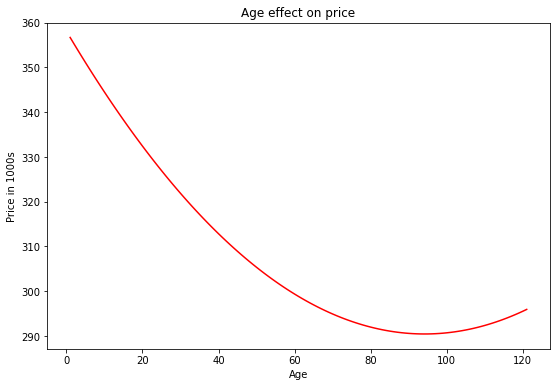

In [32]:
plt.figure(figsize=(9,6))
plt.plot(df3['Age'], Age2Pred, 'r')
plt.xlabel('Age')
plt.ylabel('Price in 1000s')
plt.title('Age effect on price')

plt.show()

In [33]:
num4 = model[['Price', 'Bath', 'SqFt', 'ACnum']].dropna()

In [34]:
mod4 = smf.ols(formula = 'Price ~ Bath + SqFt + ACnum', data=num4)

In [35]:
mod4 = mod4.fit()

In [36]:
print(mod4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     94.32
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           1.99e-29
Time:                        00:56:56   Log-Likelihood:                -561.78
No. Observations:                 107   AIC:                             1132.
Df Residuals:                     103   BIC:                             1142.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    117.0952     14.150      8.275      0.0

In [37]:
num4pt2 = model[['Price', 'Bath', 'SqFt', 'ACnum', 'Age']].dropna()

In [38]:
mod4pt2 = smf.ols(formula = 'Price ~ Bath + SqFt + ACnum + Age', data=num4pt2)

In [39]:
mod4pt2 = mod4pt2.fit()

In [40]:
mod4pt2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     76.52
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           7.65e-30
Time:                        00:56:56   Log-Likelihood:                -558.28
No. Observations:                 107   AIC:                             1127.
Df Residuals:                     102   BIC:                             1140.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    161.9184     21.919      7.387      0.000     118.442     205.395
Bath          22.2206      9.946      2.234      0.028       2.492      41.949
SqFt           6.2865      0.728      8.638      0.000       4.843       7.730
ACnum         11.3754     10.586      1.075      0.285      -9.622      32.373
Age           -0.4479      0.170     -2.627      0.010      -0.786      -0.110
==============================================================================
Omnibus:                       10.594   Durbin-Watson:                   2.212
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               18.262
Skew:                           0.382   Prob(JB):                     0.000108
Kurtosis:                       4.874   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
from numpy import log

In [42]:
num4ln = num4pt2

In [43]:
num4ln['Price'] = np.log(num4ln['Price'])

In [44]:
mod4ln = smf.ols(formula='Price ~ Bath + SqFt + ACnum + Age', data=num4ln)
mod4ln = mod4ln.fit()

In [45]:
mod4ln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     69.38
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           3.03e-28
Time:                        00:56:56   Log-Likelihood:                 59.225
No. Observations:                 107   AIC:                            -108.5
Df Residuals:                     102   BIC:                            -95.09
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2461      0.068     76.796      0.000       5.111       5.382
Bath           0.0872      0.031      2.814      0.006       0.026       0.149
SqFt           0.0168      0.002      7.386      0.000       0.012       0.021
ACnum          0.0453      0.033      1.374      0.172      -0.020       0.111
Age           -0.0013      0.001     -2.426      0.017      -0.002      -0.000
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.034   Jarque-Bera (JB):               11.671
Skew:                          -0.091   Prob(JB):                      0.00292
Kurtosis:                       4.608   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
wildcard = model[['Bath', 'Bed', 'SqFt']].dropna()
model.describe()

,Home ID,Price,Bed,Bath,SqFt,LotSize,Age,Garage,Detached,ACnum
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,56.906542,322.935981,3.411215,2.247664,20.303364,8.728963,49.803738,1.420561,0.149533,0.504673
std,32.153386,89.706315,0.951199,0.769016,9.179535,3.341580,36.384073,0.858227,0.358291,0.502331
min,2.000000,165.000000,2.000000,1.000000,6.980000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,29.500000,258.500000,3.000000,2.000000,13.100000,6.229000,17.500000,1.000000,0.000000,0.000000
50%,57.000000,299.000000,3.000000,2.000000,18.400000,8.712000,42.000000,2.000000,0.000000,1.000000
75%,84.500000,384.000000,4.000000,3.000000,25.030000,10.345000,73.500000,2.000000,0.000000,1.000000
max,111.000000,589.000000,6.000000,4.000000,54.080000,18.730000,131.000000,3.000000,1.000000,1.000000


In [47]:
wildcardreg = smf.ols(formula = 'SqFt ~ Bed + Bath', data=wildcard)
wildcardreg = wildcardreg.fit()
wildcardreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SqFt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     77.49
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           2.49e-21
Time:                        00:56:56   Log-Likelihood:                -339.73
No. Observations:                 107   AIC:                             685.5
Df Residuals:                     104   BIC:                             693.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0303      2.247     -2.684      0.008     -10.486      -1.575
Bed            3.8684      0.694      5.570      0.000       2.491       5.245
Bath           5.8451      0.859      6.805      0.000       4.142       7.548
==============================================================================
Omnibus:                       27.142   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.160
Skew:                           1.201   Prob(JB):                     1.90e-09
Kurtosis:                       4.799   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
num8 = model[['ACnum', 'Age']]
mod8f = smf.ols(formula = 'ACnum ~ Age', data=num8)
mod8 = mod8f.fit()
mod8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ACnum   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     43.13
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           2.01e-09
Time:                        00:56:56   Log-Likelihood:                -59.243
No. Observations:                 107   AIC:                             122.5
Df Residuals:                     105   BIC:                             127.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8757      0.070     12.537      0.000       0.737       1.014
Age           -0.0074      0.001     -6.568      0.000      -0.010      -0.005
==============================================================================
Omnibus:                        6.375   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                3.238
Skew:                          -0.173   Prob(JB):                        0.198
Kurtosis:                       2.221   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""